## Import Libraries

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

## Load Dataset

In [ ]:
# Load dataset
df = pd.read_csv("heart.csv")
df.head()


,Age,Sex,Chest Pain type,Resting Blood pressure,Serum Cholestoral in mg/dl,Fasting Blood sugar > 120 mg/dl,Resting Electrocardiographic results,Max heart rate achieved,Exercise induced angina,Oldpeak,Slope of the peak exercise ST segment,No of major vessels,Thal,Presence
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


## Dataset Info & Description

In [ ]:
# Dataset structure
print("\nDataset Info:")
print(df.info())

print("\nStatistical Description:")
print(df.describe())

df.isnull().sum()



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Age                                    270 non-null    int64  
 1   Sex                                    270 non-null    int64  
 2   Chest Pain type                        270 non-null    int64  
 3   Resting Blood pressure                 270 non-null    int64  
 4   Serum Cholestoral in mg/dl             270 non-null    int64  
 5   Fasting Blood sugar > 120 mg/dl        270 non-null    int64  
 6   Resting Electrocardiographic results   270 non-null    int64  
 7   Max heart rate achieved                270 non-null    int64  
 8   Exercise induced angina                270 non-null    int64  
 9   Oldpeak                                270 non-null    float64
 10  Slope of the peak exercise ST segment  270 non-null    int6

,0
Age,0
Sex,0
Chest Pain type,0
Resting Blood pressure,0
Serum Cholestoral in mg/dl,0
Fasting Blood sugar > 120 mg/dl,0
Resting Electrocardiographic results,0
Max heart rate achieved,0
Exercise induced angina,0
Oldpeak,0


## Visualizations

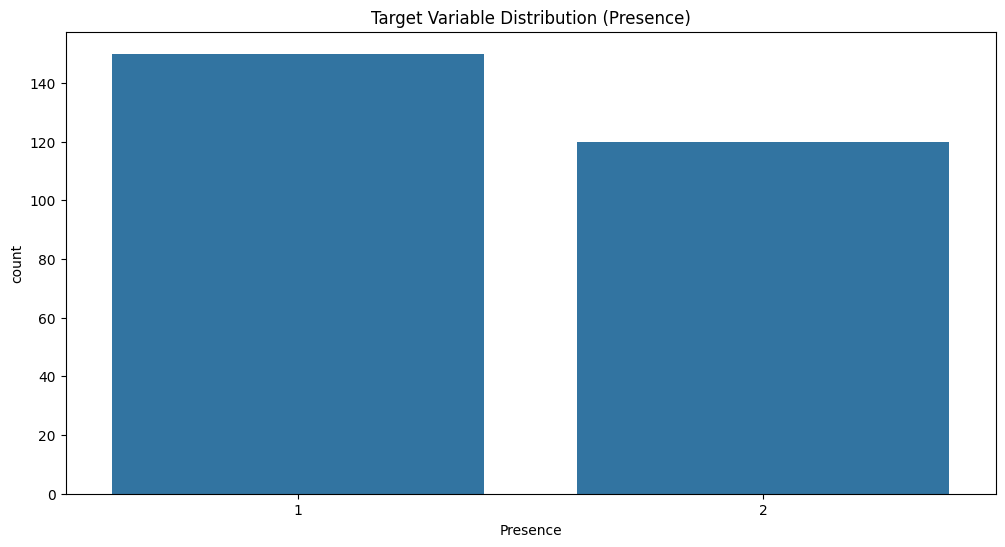

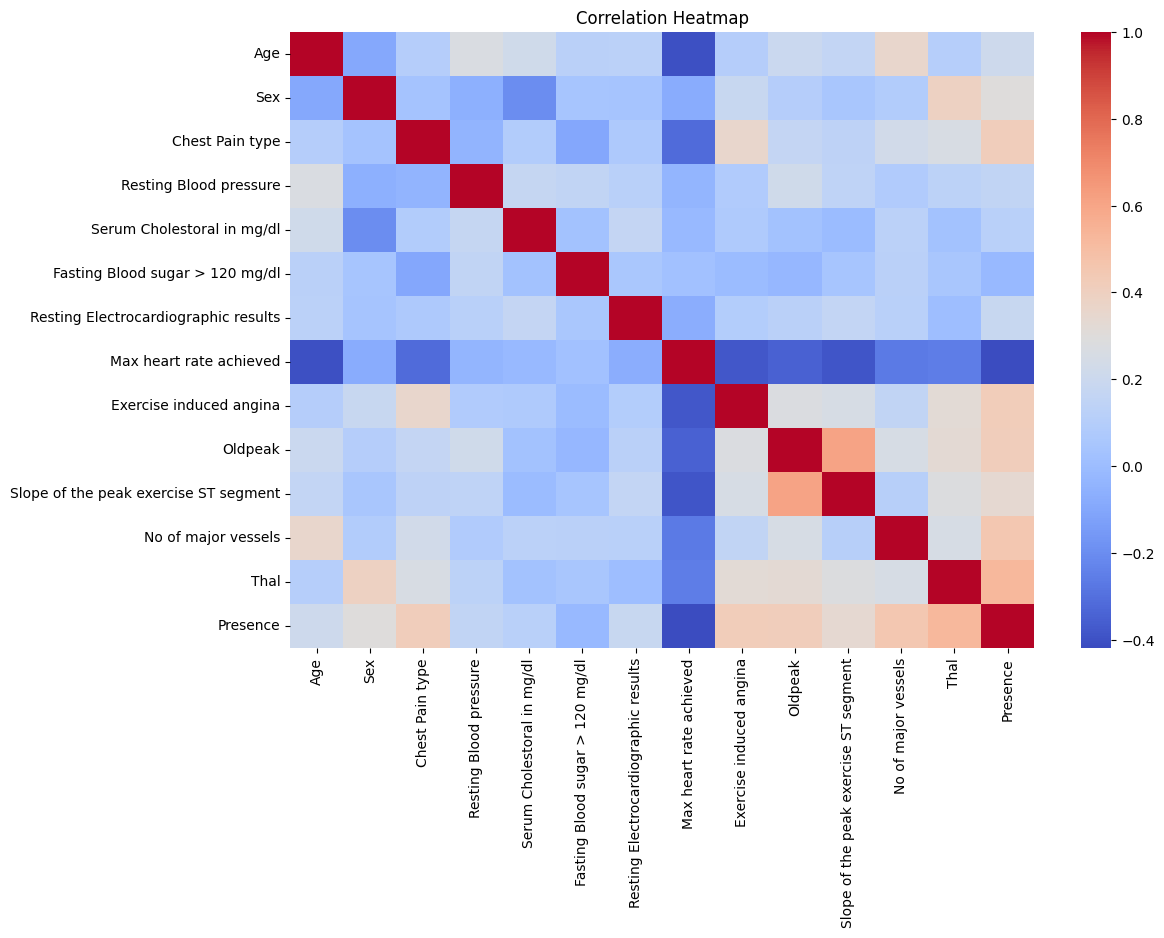

In [ ]:
# Distribution & Correlation
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Presence")
plt.title("Target Variable Distribution (Presence)")
plt.show()

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

## Split Features & Target

In [ ]:
X = df.drop("Presence", axis=1)
y = df["Presence"]

## Standardization

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# PCA (Principal Component Analysis)

## PCA with All Components

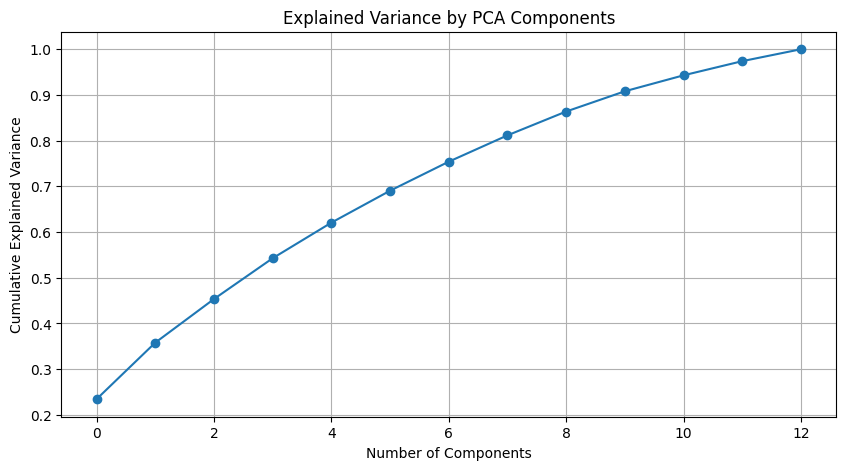

array([0.23425531, 0.12366676, 0.095472  , 0.08928379, 0.0778754 ,
       0.06989303, 0.0635299 , 0.05764219, 0.0521241 , 0.04431827,
       0.03488548, 0.03098712, 0.02606663])

In [ ]:
pca = PCA()
pca.fit(X_scaled)

explained = pca.explained_variance_ratio_

plt.figure(figsize=(10,5))
plt.plot(np.cumsum(explained), marker='o')
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.title("Explained Variance by PCA Components")
plt.grid()
plt.show()

explained

## PCA Reduce to 2D

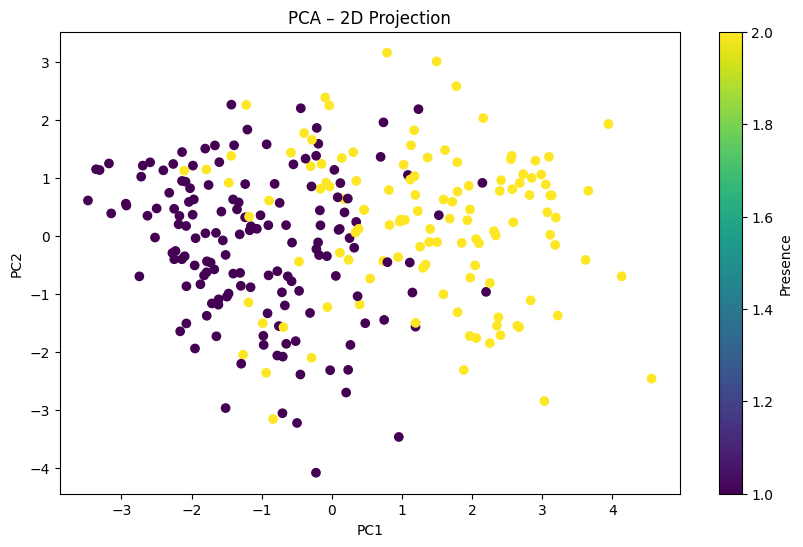

In [ ]:
pca_2d = PCA(n_components=2)
X_pca = pca_2d.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap="viridis")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA – 2D Projection")
plt.colorbar(label="Presence")
plt.show()

# Kernel PCA (for Non-Linear Separation)

## Kernel PCA (RBF Kernel)

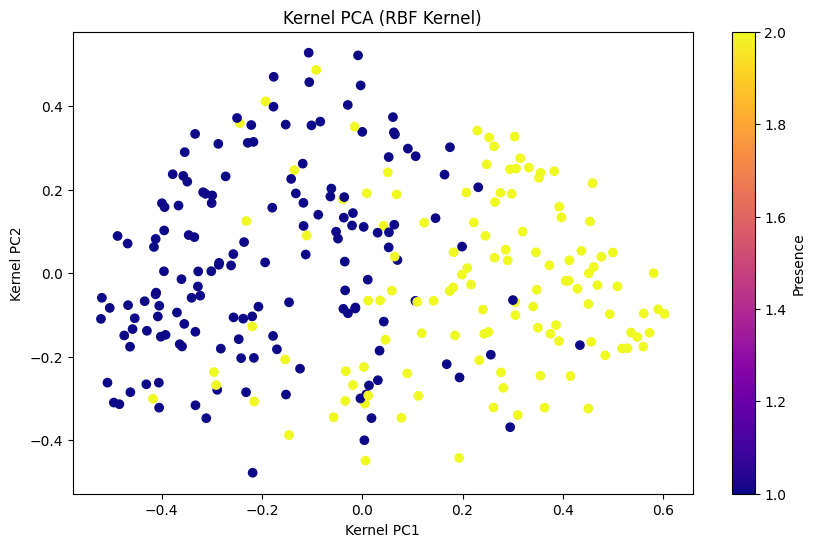

In [ ]:
kpca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_kpca = kpca.fit_transform(X_scaled)

plt.figure(figsize=(10,6))
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, cmap="plasma")
plt.xlabel("Kernel PC1")
plt.ylabel("Kernel PC2")
plt.title("Kernel PCA (RBF Kernel)")
plt.colorbar(label="Presence")
plt.show()

# LDA (Linear Discriminant Analysis)

## LDA Feature Reduction

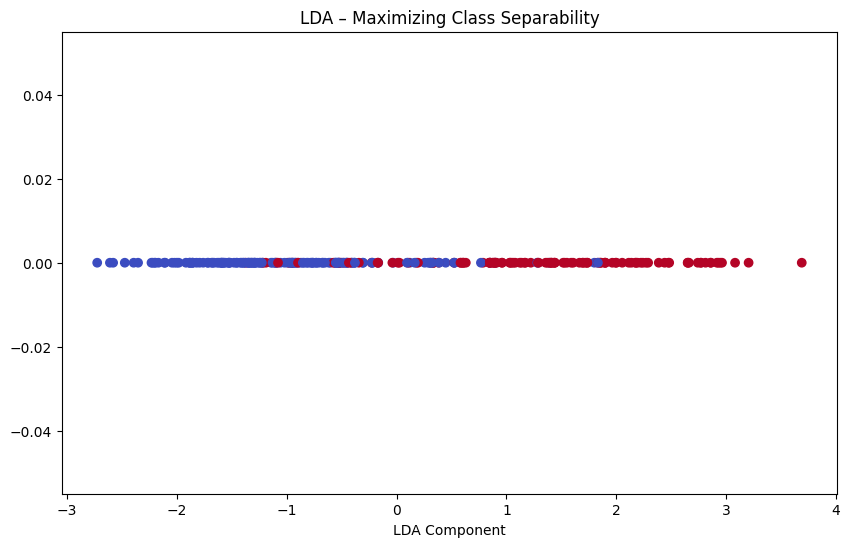

In [ ]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

plt.figure(figsize=(10,6))
plt.scatter(X_lda[:,0], np.zeros_like(X_lda), c=y, cmap="coolwarm")
plt.xlabel("LDA Component")
plt.title("LDA – Maximizing Class Separability")
plt.show()

## Reducing Features by Maximizing Class Separability (LDA)

In [ ]:
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

print("Original number of features:", X.shape[1])
print("Reduced number of features:", X_lda.shape[1])

Original number of features: 13
Reduced number of features: 1


## Print Shapes & Summary

In [ ]:
print("Original Shape:", X.shape)
print("PCA Shape:", X_pca.shape)
print("Kernel PCA Shape:", X_kpca.shape)
print("LDA Shape:", X_lda.shape)

Original Shape: (270, 13)
PCA Shape: (270, 2)
Kernel PCA Shape: (270, 2)
LDA Shape: (270, 1)


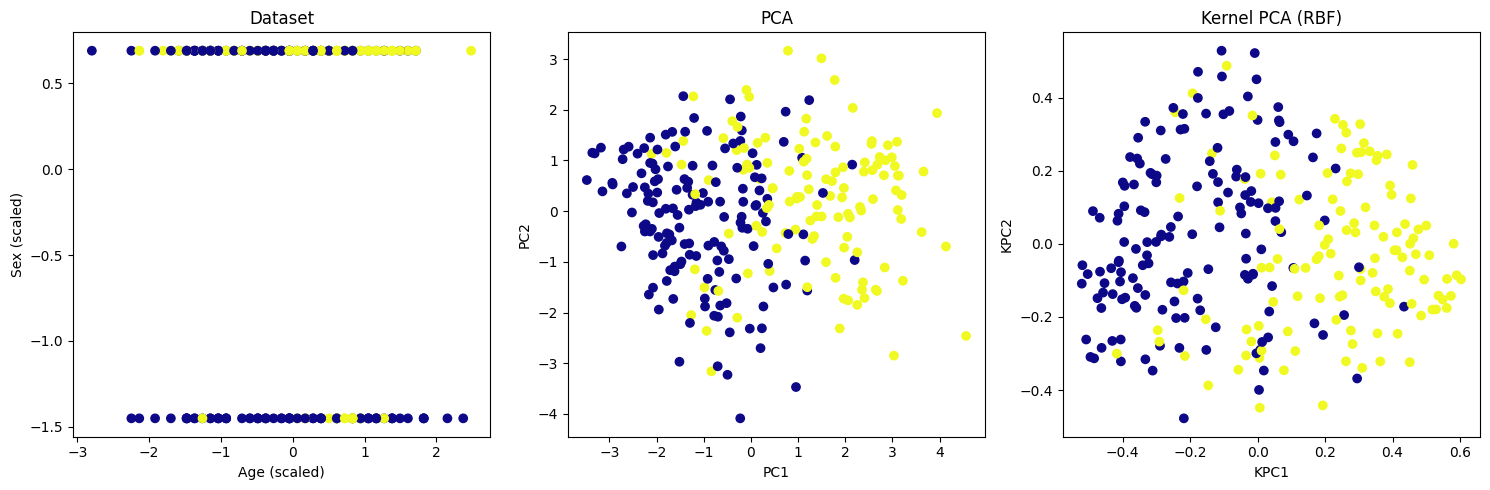

In [ ]:
plt.figure(figsize=(15,5))

# Original Dataset (first two features)
plt.subplot(1,3,1)
plt.scatter(X_scaled[:,0], X_scaled[:,1], c=y, cmap='plasma')
plt.title("Dataset")
plt.xlabel("Age (scaled)")
plt.ylabel("Sex (scaled)")

# PCA
plt.subplot(1,3,2)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='plasma')
plt.title("PCA")
plt.xlabel("PC1")
plt.ylabel("PC2")

# Kernel PCA
plt.subplot(1,3,3)
plt.scatter(X_kpca[:,0], X_kpca[:,1], c=y, cmap='plasma')
plt.title("Kernel PCA (RBF)")
plt.xlabel("KPC1")
plt.ylabel("KPC2")

plt.tight_layout()
plt.show()